## Section 1 - Setup

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

## Section 2 - Data loading

Similar to before, let's load our data from Google Drive for the 3 datasets provided. Be sure to upload the datasets into Google Drive, so that you can access them here.

In [213]:
path = "../include/dataset/"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [214]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [215]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


# Session 3 - Data Clenaring


* We first get the descriptions o `features`

In [216]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [217]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [218]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.1+ KB


* We will change the data type of `timestamp` to `datetime64`

In [219]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [220]:
sales_df = convert_to_datetime(sales_df, 'timestamp')

In [221]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [222]:
stock_df = convert_to_datetime(stock_df, 'timestamp')

In [223]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [224]:
temp_df = convert_to_datetime(temp_df, 'timestamp')

In [225]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


# Merge Data


Currently we have 3 datasets. In order to include all of this data within a predictive model, we need to merge them together into 1 dataframe. 

If we revisit the problem statement: 

```
“Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.”
```

We merge the three datasets on `timestamp`. We first transform the `timestamp` feature to `hour`, then proceed to merge these three together.

In [226]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
  dummy = data.copy()
  new_ts = dummy[column].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy[column] = new_ts
  return dummy

In [227]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [228]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [229]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Now you can see all of the `timestamp` columns have had the minutes and seconds reduced to `00`. The next thing to do, is to aggregate the datasets in order to combine rows which have the same value for `timestamp`.

For the `sales` data, we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [230]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


* We do the same aggregation for stock, here the grouping done by `timestamp` and `transaction_id`. When we aggregate, we do it by taking the mean of each feature  `estimated_stock_pct`

In [231]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


* The last, `temp_df` has no `product_id` so we jut take the average of `temperature` for each of the `timestamp`

In [232]:
temp_agg = temp_df.groupby(['timestamp']).agg(({'temperature': 'mean'})).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


* Now we are ready to merge. `stock_agg` table is used as base and the others two are attached to it

In [233]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how = 'left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [234]:
merged_df = merged_df.merge(temp_agg, on=['timestamp'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [235]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


* We can see that there are only 3067 `quantity` features, while the others have 10845.
* We assume that the null `quantity` means 0 sales of this product were made in that hour, although in practice, we should consult with the client before assuming ourselves. 
* We fill those null `quantity` features with 0 for now

In [236]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


* Next, we would combine more features into this `merged_df`
* We should not forget to drop the duplicates as there can be multiples

In [237]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

product_categories

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [238]:
merged_df = merged_df.merge(product_categories, on='product_id', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [239]:
merged_df = merged_df.merge(product_price, on='product_id', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [240]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 593.2+ KB


* Now, the merged dataframe is complete

# Feature Engineering

* Let's first engineer the `timestamp` column. In it's current form, it is not very useful for a machine learning model. Since it's a datetime datatype, we can explode this column into day of week, day of month and hour to name a few.

In [241]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19,1,1,9


* We do `one-hot ecoding` for the `category` column by creating dummy columns

In [242]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,product_id,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,1.49,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,True
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,14.19,1,1,9,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,20.19,1,1,9,False,False,...,False,False,False,False,False,False,False,False,False,False
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,8.19,1,1,9,False,False,...,False,False,False,False,True,False,False,False,False,False


In [243]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   product_id                      10845 non-null  object 
 1   estimated_stock_pct             10845 non-null  float64
 2   quantity                        10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   unit_price                      10845 non-null  float64
 5   timestamp_day_of_month          10845 non-null  int32  
 6   timestamp_day_of_week           10845 non-null  int32  
 7   timestamp_hour                  10845 non-null  int32  
 8   category_baby products          10845 non-null  bool   
 9   category_baked goods            10845 non-null  bool   
 10  category_baking                 10845 non-null  bool   
 11  category_beverages              10845 non-null  bool   
 12  category_canned foods           

* `product_id` is still not numeric. But it will add no value to the predictive model since it is just a unique ID column. 

In [244]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.14,3.0,-0.02885,1.49,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.67,0.0,-0.02885,14.19,1,1,9,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.82,0.0,-0.02885,20.19,1,1,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.05,0.0,-0.02885,8.19,1,1,9,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Modelling

* We will use supervised machine learning model to predict `estimated_stock_pct` as the target, since the problem statemet was focused on being able to predict the stock levels of products on an hourly basis.

* Whilst training the machine learning model, we use `cross-validation`

* To ensure that the trained model is able to perform robustly, we test it several times on random samples of data, not just once. `K-fold` strategy to train the machine learning model on `K` random samples of data is used.

* We create `y` and `x`


In [245]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


* We have 28 predictor variables and 10845 examples
* We need to define how many folds we want to complete during training and which proportion to split

In [246]:
K = 10
split = 0.75

* We use `RandomForestRegressor` model, powerful tree based ensemble
* We are using `regression` algorithm because we are predicting a continuous numeric variable, `estimated_stock_pct`.


In [247]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [249]:
accuracy = []

for fold in range(0, K):
    model = RandomForestRegressor()
    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state = 42)
    
    #Z_score normalization to make contour distribute uniformly
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    trained_model = model.fit(X_train, y_train)
    
    y_pred = trained_model.predict(X_test)

    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    accuracy.append(mae)
    print(f"Fold {fold + 1}: MAE = {mae:.3f}")

print(f"Average MAE: {(sum(accuracy) / len(accuracy)):.2f}")

Fold 1: MAE = 0.237
Fold 2: MAE = 0.237
Fold 3: MAE = 0.236
Fold 4: MAE = 0.237
Fold 5: MAE = 0.237
Fold 6: MAE = 0.237
Fold 7: MAE = 0.236
Fold 8: MAE = 0.237
Fold 9: MAE = 0.236
Fold 10: MAE = 0.236
Average MAE: 0.24


* This is very interesting though. We can see that the `mean absolute error` (MAE) is almost exactly the same each time. This is a good sign, it shows that the performance of the model is consistent across different random samples of the data, which is what we want. In other words, it shows a robust nature.

* The `MAE` was chosen as a performance metric because it describes how closely the machine learning model was able to predict the exact value of `estimated_stock_pct`.

* Even though the model is predicting robustly, this value for MAE is not so good, since the average value of the target variable is around 0.51, meaning that the accuracy as a percentage was around 50%. In an ideal world, we would want the MAE to be as low as possible. This is where the iterative process of machine learning comes in. At this stage, since we only have small samples of the data, we can report back to the business with these findings and recommend that the the dataset needs to be further engineered, or more datasets need to be added.

* We will visualize the feature importances with matplotlib

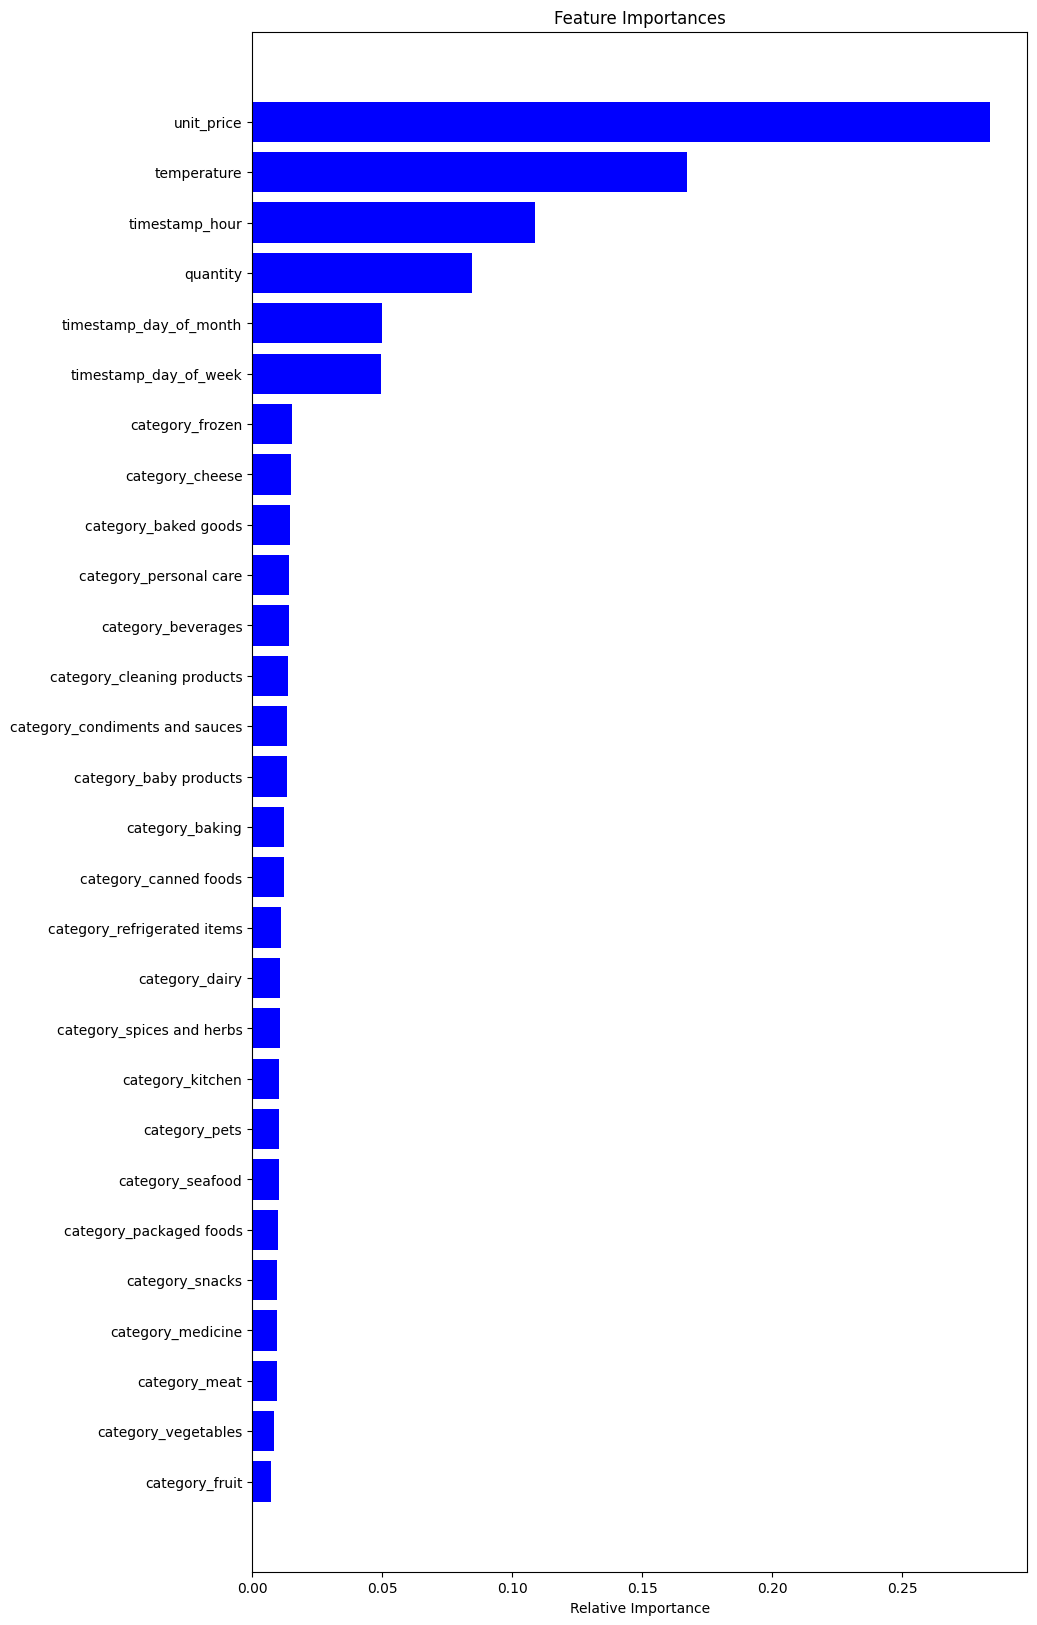

In [257]:
features = [i for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

- The product categories were not that important
- The unit price and temperature were important in predicting stock
- The hour of day was also important for predicting stock

With these insights, we can now report this back to the business